## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data file
WHO_results_path = "FluViewPhase2Data/WHO_NREVSS_Combined_prior_to_2015_16.csv"

# Read the flu data and skip header row
WHO_df = pd.read_csv(WHO_results_path, skiprows=1)

WHO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14094 entries, 0 to 14093
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   REGION TYPE                  14094 non-null  object
 1   REGION                       14094 non-null  object
 2   YEAR                         14094 non-null  int64 
 3   WEEK                         14094 non-null  int64 
 4   TOTAL SPECIMENS              14094 non-null  object
 5   PERCENT POSITIVE             14094 non-null  object
 6   A (2009 H1N1)                14094 non-null  object
 7   A (H1)                       14094 non-null  object
 8   A (H3)                       14094 non-null  object
 9   A (Subtyping not Performed)  14094 non-null  object
 10  A (Unable to Subtype)        14094 non-null  object
 11  B                            14094 non-null  object
 12  H3N2v                        14094 non-null  object
dtypes: int64(2), object(11)
memory 

In [2]:
#When trying to convert columns to type float - returned that string "X" values present
#Change any X values to zero
WHO_df_clean = WHO_df.replace('X',0)

#Convert result columns to numbers
WHO_df_clean['TOTAL SPECIMENS'] = pd.to_numeric(WHO_df_clean['TOTAL SPECIMENS'])
WHO_df_clean['PERCENT POSITIVE'] = pd.to_numeric(WHO_df_clean['PERCENT POSITIVE'])
WHO_df_clean['A (2009 H1N1)'] = pd.to_numeric(WHO_df_clean['A (2009 H1N1)'])
WHO_df_clean['A (H1)'] = pd.to_numeric(WHO_df_clean['A (H1)'])
WHO_df_clean['A (H3)'] = pd.to_numeric(WHO_df_clean['A (H3)'])
WHO_df_clean['A (Subtyping not Performed)'] = pd.to_numeric(WHO_df_clean['A (Subtyping not Performed)'])
WHO_df_clean['A (Unable to Subtype)'] = pd.to_numeric(WHO_df_clean['A (Unable to Subtype)'])
WHO_df_clean['B'] = pd.to_numeric(WHO_df_clean['B'])
WHO_df_clean['H3N2v'] = pd.to_numeric(WHO_df_clean['H3N2v'])
WHO_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14094 entries, 0 to 14093
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REGION TYPE                  14094 non-null  object 
 1   REGION                       14094 non-null  object 
 2   YEAR                         14094 non-null  int64  
 3   WEEK                         14094 non-null  int64  
 4   TOTAL SPECIMENS              14094 non-null  int64  
 5   PERCENT POSITIVE             14094 non-null  float64
 6   A (2009 H1N1)                14094 non-null  int64  
 7   A (H1)                       14094 non-null  int64  
 8   A (H3)                       14094 non-null  int64  
 9   A (Subtyping not Performed)  14094 non-null  int64  
 10  A (Unable to Subtype)        14094 non-null  int64  
 11  B                            14094 non-null  int64  
 12  H3N2v                        14094 non-null  int64  
dtypes: float64(1), i

In [3]:
#Sum flu columns to return total positives for A type, B type and combined
WHO_df_clean['Total A Positives'] = WHO_df_clean['A (2009 H1N1)'] + WHO_df_clean['A (H1)'] + WHO_df_clean['A (H3)'] +\
                                    WHO_df_clean['A (Subtyping not Performed)'] + WHO_df_clean['A (Unable to Subtype)'] +\
                                    WHO_df_clean['H3N2v']

WHO_df_clean['Total B Positives'] = WHO_df_clean['B']

WHO_df_clean['Total Positives'] = WHO_df_clean['Total A Positives'] + WHO_df_clean['Total B Positives']

WHO_df_clean.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,Total A Positives,Total B Positives,Total Positives
0,States,Alabama,2010,40,54,0.00,0,0,0,0,0,0,0,0,0,0
1,States,Alaska,2010,40,40,0.00,0,0,0,0,0,0,0,0,0,0
2,States,Arizona,2010,40,40,2.50,0,0,1,0,0,0,0,1,0,1
3,States,Arkansas,2010,40,15,0.00,0,0,0,0,0,0,0,0,0,0
4,States,California,2010,40,183,3.28,2,0,3,0,0,1,0,5,1,6


In [4]:
#Filter to desired states
filtered_df = WHO_df_clean.loc[(WHO_df_clean['REGION']=='New York')|(WHO_df_clean['REGION']=='Illinois')|
                               (WHO_df_clean['REGION']=='Texas')|(WHO_df_clean['REGION']=='Arizona')|
                               (WHO_df_clean['REGION']=='Georgia')|(WHO_df_clean['REGION']=='Pennsylvania')|
                               (WHO_df_clean['REGION']=='California')|(WHO_df_clean['REGION']=='Washington')|
                               (WHO_df_clean['REGION']=='Colorado')]

#Re-name columns to match other dataset
renamed_df = filtered_df.rename(columns = {'REGION': 'State', 'YEAR':'year', 'WEEK':'week'})
renamed_df.count()

REGION TYPE                    2349
State                          2349
year                           2349
week                           2349
TOTAL SPECIMENS                2349
PERCENT POSITIVE               2349
A (2009 H1N1)                  2349
A (H1)                         2349
A (H3)                         2349
A (Subtyping not Performed)    2349
A (Unable to Subtype)          2349
B                              2349
H3N2v                          2349
Total A Positives              2349
Total B Positives              2349
Total Positives                2349
dtype: int64

In [5]:
#Export results to CSV
final_df = renamed_df[['State', 'year', 'week', 'Total Positives']]
final_df.to_csv('Data/Total Positives for Desired States.csv', index=False)

## Summary Statistics

In [6]:
# Generate a summary statistics table for each state
state_group = renamed_df.groupby(['State','year'])
summary_statistics = state_group.agg({
    'Total Positives':['sum','mean', 'median','var', 'std', 'sem']})
summary_statistics

Total Positives                                    \
                              sum        mean median            var   
State        year                                                     
Arizona      2010             424   32.615385    3.0    2298.089744   
             2011            1739   33.442308    1.0    4669.192685   
             2012            1576   30.307692   12.0    1979.785822   
             2013            1954   37.576923    3.0    5713.817496   
             2014            2159   40.735849   16.0    3907.313498   
             2015            1845   47.307692   10.0    6516.218623   
California   2010             169   13.000000    7.0     119.166667   
             2011            1107   21.288462    3.0    1350.444570   
             2012            1417   27.250000    7.0    1364.975490   
             2013            2282   43.884615    6.0    6777.751131   
             2014            3470   65.471698   14.0   13611.177068   
             2015            8303  212.897436   27.0  144160.673414   
Colorado     2010             169   13.000000    5.0     300.500000   
             2011            1155   22.211538    2.5    1367.699472   
             2012            1411   27.134615    6.5    1336.393288   
             2013            2989   57.480769    4.0    9427.313348   
             2014            4247   80.132075    9.0   28379.193759   
             2015            1197   30.692308    3.0    2300.113360   
Georgia      2010            1460  112.307692  119.0   10814.064103   
             2011            1783   34.288462    5.0    4377.621041   
             2012            3275   62.980769   22.0   14867.117270   
             2013            4908   94.384615   20.0   14372.555053   
             2014            4443   83.830189   15.0   26851.720610   
             2015            1519   38.948718    6.0    2983.260459   
Illinois     2010             130   10.000000    4.0     183.000000   
             2011             487    9.365385    0.0     332.903092   
             2012             657   12.634615    3.0     489.177602   
             2013             492    9.461538    1.5     328.096531   
             2014            2839   53.566038    8.0   11780.596517   
             2015            1106   28.358974    3.0    1539.920378   
New York     2010             616   47.384615   26.0    4095.756410   
             2011            3185   61.250000    1.0   10943.093137   
             2012            2900   55.769231   14.0   19800.377074   
             2013            5133   98.711538    7.5   30585.189668   
             2014            6793  128.169811   20.0   34755.912917   
             2015            6968  178.666667   17.0   68333.964912   
Pennsylvania 2010             369   28.384615   12.0    1557.923077   
             2011            2252   43.307692    1.0    7029.511312   
             2012            1360   26.153846    4.0    3122.524887   
             2013            1739   33.442308    3.0    3531.545626   
             2014            3071   57.943396   24.0   10982.246734   
             2015            2100   53.846154    8.0    9488.028340   
Texas        2010             706   54.307692   16.0    5224.064103   
             2011            3864   74.307692    1.5   26801.040724   
             2012            3945   75.865385   20.5   19638.079563   
             2013            7745  148.942308   12.5   78679.192685   
             2014            9889  186.584906   50.0   98246.555152   
             2015            4423  113.410256   12.0   37747.037787   
Washington   2010              64    4.923077    5.0      13.910256   
             2011             794   15.269231    1.5     619.651584   
             2012            1918   36.884615   20.5    1834.378582   
             2013            1756   33.769231    3.0    3925.671192   
             2014            1922   36.264151    9.0    3395.544267   
             2015            1141   29.256

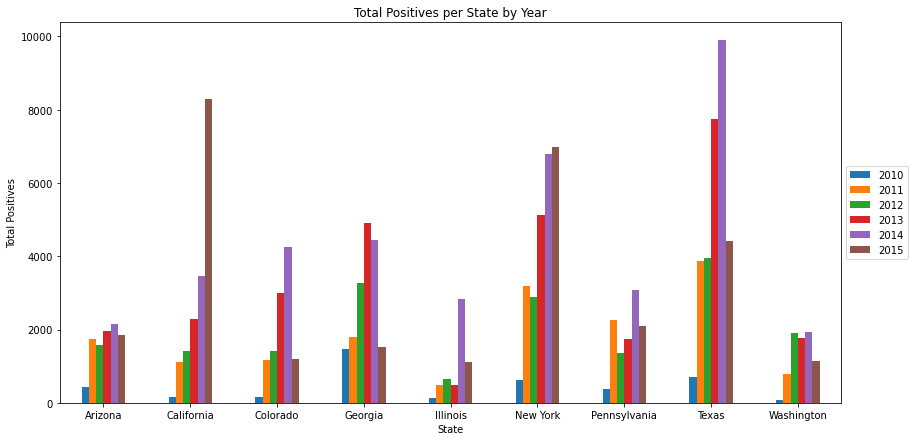

In [7]:
bar_plot = state_group['Total Positives'].sum().unstack().plot(kind='bar', legend=False, figsize=(14,7), rot = 0,
                                             title='Total Positives per State by Year')
bar_plot.set_ylabel('Total Positives')
bar_plot.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plt.show()